# Reporte de práctica 5: Pruebas estadísticas


## Objetivo 

- Realizar tres análisis estadísticos a los datos del cine. Primero realizaremos histogramas de la información para observar su comportamiento si es normalizado o no.


## Pruebas estadísticas

Existen dos grandes grupos de pruebas de significación estadística, las paramétricas y las no paramétricas


#### Pruebas paramétricas
Las pruebas paramétricas son para datos numéricos (escalas de intervalos o razones) y , por lo general, están basadas en las propiedades de la distribución normal o gaussiana, para la variable dependiente. Los requisitos para poder usar estas pruebas son:

    - Las observaciones deben ser independientes entre sí.
    - Las poblaciones deben hacerse en poblaciones distribuidas normalmente.
    - Estas poblaciones deben tener la misma varianza.
    - Las variables deben haberse medido por lo menos en una escala de intervalo de manera que sea posible utilizar las operaciones aritméticas.


#### Pruebas no paramétricas
Las pruebas no paramétricas son utilizadas con variables nominales y ordinales, no asumen un tipo particular de distribución, se aceptan distribuciones no normales, la exigencia en cuanto al tamaño de la muestra es menor que en el caso de las paramétricas.

Las pruebas no paramétricas son necesarias cuando:

    - Los tamaños de las muestras son tan pequeñas como N=6
    - La investigación aporta resultados que solo se puedan referir a un comportamiento de los sujetos en mayor o menor grado de ciertas características, pero sin especificar cantidad.

### Lectura de Datos

Como se harán gráficas de los datos, se instaló la librería Plotly de python3 para hacer esta tarea, debido a que es una librería de pago, se creó una cuenta gratuita en la cual estamos limitados a veinticinco gráficas.

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import pandas as pd
cine = pd.read_excel('2018.xlsx', index_col=None, header=0, sheet_name=0)
cine = cine[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas']]

### Sincronizar con Plotly

Agregaremos los datos de usuario y la llave api para poder graficar con Plotly.

In [2]:
import plotly
plotly.tools.set_credentials_file(username='SamatarouKami', api_key='X0OGa3VP5G6DWcfBivYa')

## Características de los datos

Se quiere comprobar si los datos de Edad y Personas que participan en un proyecto están normalmente distribuidos. Se determina que clase de pruebas se deben realizar sobre estos. Primero que nada haremos pruebas de normalidad, graficaremos el histograma de los datos.

In [3]:
layout = {'xaxis': {'range': [12, 59]}}
py.iplot({'data': [go.Histogram(x = cine.Edad, histnorm='probability')], 'layout': layout}, filename='P5_1')

In [4]:
layout = {'xaxis': {'range': [0, 71]}}
py.iplot({'data': [go.Histogram(x = cine.Personas, histnorm='probability')], 'layout': layout}, filename='P5_2')

Como se observa en el histograma, la edad parece estar normalmente distribuida y las personas por film se encuentran en sesgo, se puede identificar una asimetría a la derecha.

Ahora se prueba con QQplot si los datos son normalmente distribuidos.

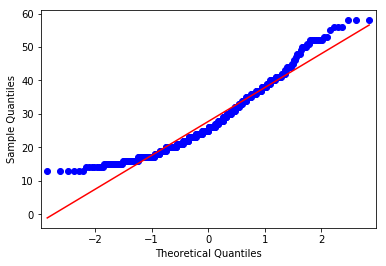

In [12]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
g = qqplot(cine.Edad, line='s')

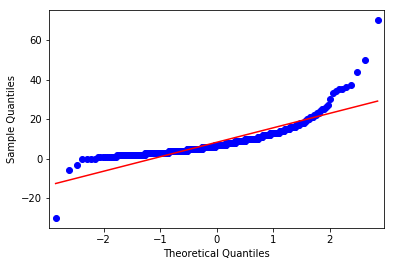

In [6]:
y = qqplot(cine.Personas, line='s')

Se tiene que los histogramas no son suficientes para determinar la normalidad de las Edades. En el grafico de Personas sabemos que no está normalizado. Los resultados de QQplot son curiosos porque pareciera que ambas distribuciones están normalizadas. 

Para confirmar la naturaleza de los datos aplicaremos la prueba de normalidad Shapiro-Wilks.

In [7]:
from numpy import concatenate, isnan

datos = {'Edad': cine.Edad , \
         'Participantes': cine.Personas}
from scipy.stats import shapiro
for alpha in [0.05, 0.01]:
    for data in datos:
        crudos = datos[data]
        s, p = shapiro(crudos[~isnan(crudos)]) # es MUY importante quitar los NaN
        print('{:s} {:.2f} {:.3f}'.format(data, s, p))
        if p > alpha:
            print('aceptablemente normal con nivel de significancia', alpha)
        else:
            print('no parece ser normal con nivel de significancia', alpha)

Edad 0.94 0.000
('no parece ser normal con nivel de significancia', 0.05)
Participantes 0.76 0.000
('no parece ser normal con nivel de significancia', 0.05)
Edad 0.94 0.000
('no parece ser normal con nivel de significancia', 0.01)
Participantes 0.76 0.000
('no parece ser normal con nivel de significancia', 0.01)


### Naturaleza de los datos

Con el histograma y la prueba Shapiro-Wilks, determinamos que la naturaleza de los datos es no paramétrica. Por esto se aplican pruebas de este tipo a los datos.


## Pruebas estadísticas no paramétricas

Las pruebas que se realizan sobre los datos son:

    Mann-Whitney
    Wilcoxon
    Kruskal-Wallis
    
Se propone la hipótesis de que los jóvenes forman grupos para poder grabar los filmes y se registran como grupo. Se realizan las tres pruebas sobre esta misma hipótesis. Se preparan las funciones para realizar las pruebas.

In [8]:
from numpy import isnan
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

def MannWhitney(c1, c2):
    d1 = c1[~isnan(c1)]
    d2 = c2[~isnan(c2)]
    n1 = len(d1)
    n2 = len(d2)
    if min(n1, n2) < 20:
        print('hay muy pocos datos como para obtener un resultado confiable')
        return
    for alpha in [0.05, 0.01]:
        s, p = mannwhitneyu(d1, d2)
        print('{:d} {:d} {:.2f} {:.3f}'.format(n1, n2, s, p))
        if p > alpha:
            print('son igualmente distribuidos con nivel de significancia', alpha)
        else:
            print('se ven diferentemente distribuidos con nivel de significancia', alpha)
            
            
def Wilcoxon(c1, c2):
    d1 = c1[~isnan(c1)]
    d2 = c2[~isnan(c2)]
    n1 = len(d1)
    n2 = len(d2)
    if min(n1, n2) < 20:
        print('hay muy pocos datos como para obtener un resultado confiable')
        return
    for alpha in [0.05, 0.01]:
        s, p = wilcoxon(d1, d2)
        print('{:d} {:d} {:.2f} {:.3f}'.format(n1, n2, s, p))
        if p > alpha:
            print('son igualmente distribuidos con nivel de significancia', alpha)
        else:
            print('se ven diferentemente distribuidos con nivel de significancia', alpha)
            
            
def KruskalWallis(c1, c2):
    d1 = c1[~isnan(c1)]
    d2 = c2[~isnan(c2)]
    n1 = len(d1)
    n2 = len(d2)
    if min(n1, n2) < 20:
        print('hay muy pocos datos como para obtener un resultado confiable')
        return
    for alpha in [0.05, 0.01]:
        s, p = kruskal(d1, d2)
        print('{:d} {:d} {:.2f} {:.3f}'.format(n1, n2, s, p))
        if p > alpha:
            print('son igualmente distribuidos con nivel de significancia', alpha)
        else:
            print('se ven diferentemente distribuidos con nivel de significancia', alpha)            

In [9]:
MannWhitney(cine.Edad, cine.Personas)

452 452 7679.00 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.05)
452 452 7679.00 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.01)


In [10]:
Wilcoxon(cine.Edad, cine.Personas)

452 452 1949.50 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.05)
452 452 1949.50 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.01)


In [11]:
KruskalWallis(cine.Edad, cine.Personas)

452 452 579.81 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.05)
452 452 579.81 0.000
('se ven diferentemente distribuidos con nivel de significancia', 0.01)


# Conclusiones
A pesar de que la los datos de las edades parecen distribuidos normalmente, al realizar pruebas de normalidad se pudo comprobar que los datos no están normalizados. Por este motivo se realizaron pruebas no paramétricas para comprobar la relación de los datos. Se buscó demostrar la hipótesis de que los jóvenes se agrupan para participar. Quedando demostrado por tres diferentes pruebas que no hay relación.

--04 de junio 2019-- Luis Angel Gutiérrez Rodríguez 1484412